In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import json
import datetime

In [2]:
data = pd.read_csv('Data/takehome_users.csv', encoding='latin-1')
data

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [3]:
data.shape

(12000, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
data['last_session_creation_time'].fillna(data['last_session_creation_time'].median, inplace=True)
data['invited_by_user_id'].fillna(data['invited_by_user_id'].median, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   object_id                   12000 non-null  int64 
 1   creation_time               12000 non-null  object
 2   name                        12000 non-null  object
 3   email                       12000 non-null  object
 4   creation_source             12000 non-null  object
 5   last_session_creation_time  12000 non-null  object
 6   opted_in_to_mailing_list    12000 non-null  int64 
 7   enabled_for_marketing_drip  12000 non-null  int64 
 8   org_id                      12000 non-null  int64 
 9   invited_by_user_id          12000 non-null  object
dtypes: int64(4), object(6)
memory usage: 937.6+ KB


In [7]:
user_df = pd.read_csv('Data/takehome_user_engagement.csv')
user_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [8]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
A = user_df['user_id'].nunique()
A

8823

In [10]:
B = data['object_id'].nunique()
B

12000

In [11]:
user_df['login_date'] = user_df['time_stamp'].apply(lambda x:x[:10])
user_df.head()

,time_stamp,user_id,visited,login_date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [12]:
#Function to identify adopted users who are logged into the product on three separate days and assign as adopted=1, else adopted=0

def adapt_user(logins):
    adp=False #flag to check if the user is engaged
    adp_rt=0
    if len(logins)<3:
        return adp_rt
    i=0
    while (~adp) & (i+2<len(logins)):
        first_login_dt=pd.to_datetime(logins.values[i])
        second_login_dt=pd.to_datetime(logins.values[i+1])

       
        while (((first_login_dt-second_login_dt).days) >= 1) & (i+2<len(logins)):
            i=i+1
            second_login_dt=pd.to_datetime(logins.values[i+1])
        third_login_dt=pd.to_datetime(logins.values[i+2])
        
        #find if third login date is not the same day as the second day
        while (((second_login_dt-third_login_dt).days) >= 1) & (i+2<len(logins)):
            i=i+1
            third_login_dt=pd.to_datetime(logins.values[i+1])
        
        #check if the diff between three successive login is less than 7 days
        if ((third_login_dt-first_login_dt).days) < 7:
            adp=True
            adp_rt=1
        i=i+1

    return adp_rt

In [13]:
user_egm=user_df[['user_id','login_date']].groupby('user_id')

In [14]:
usr_eng_dict={}
for i in user_egm:
    user=i[1]['user_id'].iloc[0]
    login_times=i[1]['login_date']
    usr_eng_dict[user]=adapt_user(login_times)

In [15]:
usr_eng_df=pd.DataFrame(pd.Series(usr_eng_dict)).reset_index()

In [16]:
usr_eng_df.columns=['user','adopted']

In [17]:
usr_eng_df.head()

,user,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [18]:
data=data.set_index('object_id')

In [19]:
usr_eng_df= usr_eng_df.set_index('user')

In [20]:
usr_eng_df.head()

,adopted
user,
1,0
2,1
3,0
4,0
5,0


In [21]:
data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.0,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.0,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.0,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.0,0,0,193,5240.0


In [22]:
data=pd.concat([data,usr_eng_df],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  12000 non-null  object 
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          12000 non-null  object 
 9   adopted                     8823 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [23]:
data['adopted']=data['adopted'].fillna(0)

In [24]:
data['adopted'].mean()*100

13.350000000000001

In [25]:
#percentage of engaged users by email opt in
data[['opted_in_to_mailing_list','adopted']].groupby('opted_in_to_mailing_list')['adopted'].mean()

opted_in_to_mailing_list
0    0.131912
1    0.138277
Name: adopted, dtype: float64

In [26]:
#percentage of engaged users by enabled_for_marketing_drip
data[['enabled_for_marketing_drip','adopted']].groupby('enabled_for_marketing_drip')['adopted'].mean()

enabled_for_marketing_drip
0    0.132837
1    0.137277
Name: adopted, dtype: float64

In [27]:
#percentage of engaged users by creation source
data[['creation_source','adopted']].groupby('creation_source')['adopted'].mean()

creation_source
GUEST_INVITE          0.166436
ORG_INVITE            0.129995
PERSONAL_PROJECTS     0.077688
SIGNUP                0.140393
SIGNUP_GOOGLE_AUTH    0.167509
Name: adopted, dtype: float64

In [28]:
data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810.0,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504.0,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892.0,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168.0,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660.0,0,0,193,5240.0,0.0


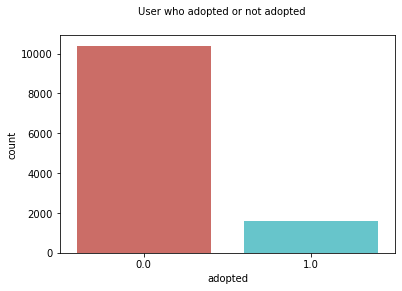

In [29]:
#See the countplot for number of users who identified as adopted or not.

plt.suptitle("User who adopted or not adopted", fontsize=10)
sns.countplot(x='adopted', data=data, palette='hls')
plt.show()

In [30]:
# Count the number of attrition or number of no attrition
print("Total records: ", len(data))
print("Records for adopted user,'Yes',: ", sum(data.adopted == 1))
print("Records for non-adopted user,'No',: ", sum(data.adopted == 0))

Total records:  12000
Records for adopted user,'Yes',:  1602
Records for non-adopted user,'No',:  10398


As seen from the count plot above, there is a big gap between '0' and '1' values of binary response, 'adopted'. Thus, an up sample for minority class, '1' in our data, will be applied in order to reinforce its signal. Then, a new data frame consisting of up-sampled minority class will be created.

In [31]:
from sklearn.utils import resample #import the resampling module from Scikit-Learn
# Separate majority and minority classes
df_majority = data[data.adopted==0]
df_minority = data[data.adopted==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=10398,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.adopted.value_counts()

0.0    10398
1.0    10398
Name: adopted, dtype: int64

As seen from above, the ratio of two classes are now equal to 1.

# Data Modelling

In [32]:
#Encode categorical 'creation' feature as dummy code.
data_encod = pd.get_dummies(df_upsampled, columns = ['creation_source'])

data_encod.head()

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1398138810.0,1,0,11,10803.0,0.0,1,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1363734892.0,0,0,94,1525.0,0.0,0,1,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1369210168.0,0,0,1,5151.0,0.0,1,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1358849660.0,0,0,193,5240.0,0.0,1,0,0,0,0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1387424226.0,0,0,197,11241.0,0.0,1,0,0,0,0


In [33]:
#Delete data having non-numeric observation.
cols = ["creation_time", "name", "email", "org_id",'invited_by_user_id']
for i in cols:
    del data_encod[i]

# Random Forest

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = data_encod.adopted
X = data_encod.drop('adopted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'method'